# Plotting Band Structure Stuff

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import pandas as pd 

%config InlineBackend.figure_formats = ['svg']

In [56]:
data = band_structure_gen("./eucd2as2.bands.dat.gnu")
data_new = remove_bands_energy_range(data, 9.73 - 3, 9.73 + 3)

In [48]:
def band_structure_gen(file_path):

    with open(file_path, "r") as f:
        lines = f.readlines()
    data = [[[],[]]]
    counter = 0 
    for index, line in enumerate(lines):
        row_data = line.strip() 
        if row_data == "":
            counter += 1 
            data.append([[],[]])
            continue 
        row_data = row_data.split()
        data[counter][0].append(float(row_data[0]))
        data[counter][1].append(float(row_data[1]))
    
    return data 

def remove_bands_energy_range(data, E_min, E_max):
    """ removes bands with energies outside of this range """
    data_new = [[[], []]]
    counter = 0 
    for deets in data:
        if deets[1] == []:
            continue 
        max_value = max(deets[1])
        min_value = min(deets[1])
        
        if max_value > E_max + 5 or min_value < E_min - 5:
            continue 
        else: 
            data_new[counter][0] = deets[0]
            data_new[counter][1] = deets[1]
            counter += 1 
            data_new.append([[],[]])
    return data_new

def plot_bands(data, fermi_energy, E_min, E_max, colormap = "viridis", kpath = 'MGM', filename = 'eucd2as2'):
    
    # generate colors 
    n_bands = len(data)
    colors = plt.get_cmap(colormap, n_bands)
    custom_palette = [mpl.colors.rgb2hex(colors(i)) for i in range(colors.N)]
    
    for index, deets in enumerate(data):
        y_axis = [x - fermi_energy for x in deets[1]]
        plt.plot(deets[0], y_axis, color = custom_palette[index], linewidth = 1.5)
    
    plt.ylabel("E - E$_F$ (eV)")
    plt.ylim(E_min - fermi_energy, E_max - fermi_energy)
    plt.xlim(0.0, data[0][0][-1])
                             
    # plotting horizontal line fermi 
    data_length = len(data[0][0])
    y_zeros = np.zeros(data_length)
    plt.plot(data[0][0], y_zeros, linestyle = '--', color = 'black', linewidth = 1)
    
    # plotting vertical lines 
    midpoint = (data[0][0][-1] - data[0][0][0])/2
    
    #x_zeros = np.zeros(data_length)
    x_mids = np.full(data_length, midpoint)
    #x_last = np.full(data_length, data[0][0][-1])
    
    y_vals = np.linspace(E_min - fermi_energy, E_max - fermi_energy, data_length)
    
    #plt.plot(x_zeros, y_vals, color = 'black', linewidth = 1)
    #plt.plot(x_mids, y_vals, color = 'black', linewidth = 1)
    #plt.plot(x_last, y_vals, color = 'black', linewidth = 1)
    
    #plt.gca().xaxis.set_tick_params(labelbottom=False)
    #plt.gca().set_xticks([])
    width = data[0][0][-1] - data[0][0][0]
    height = E_max - E_min
    plt.gca().set_aspect(width/height * 1.25)
    
    if kpath == 'MGM':
        plt.plot(x_mids, y_vals, color = 'black', linewidth = 1)
        plt.gca().set_xticks([0, midpoint, data[0][0][-1]])
        plt.gca().set_xticklabels(['M','$\Gamma$','M'])
        
    elif kpath == 'KGK':
        plt.plot(x_mids, y_vals, color = 'black', linewidth = 1)
        plt.gca().set_xticks([0, midpoint, data[0][0][-1]])
        plt.gca().set_xticklabels(['K','$\Gamma$','K'])
        
    elif kpath == 'AGA':
        plt.plot(x_mids, y_vals, color = 'black', linewidth = 1)
        plt.gca().set_xticks([0, midpoint, data[0][0][-1]])
        plt.gca().set_xticklabels(['A','$\Gamma$','A'])
    
    else: 
        plt.gca().set_aspect(width/height / 2)
        gamma_0 = np.zeros(data_length)
        m_vals = np.full(data_length, data[0][0][30])
        k_vals = np.full(data_length, data[0][0][48])
        gamma_1 = np.full(data_length, data[0][0][84])
        a_vals = np.full(data_length, data[0][0][101])
        l_vals = np.full(data_length, data[0][0][132])
        h_vals = np.full(data_length, data[0][0][148])
        a_vals_2 = np.full(data_length, data[0][0][185])
        
        y_vals2 = [gamma_0, m_vals, k_vals, gamma_1, a_vals, l_vals, h_vals, a_vals_2]
        labels = ["$\Gamma$", "M", "K", "$\Gamma$",  "A", "L", "H", "A, L", "H,K", ""]
        
        for thing in y_vals2:
            plt.plot(thing, y_vals, color = 'black', linewidth = 1)
        
        plt.gca().set_xticks([0, data[0][0][30], data[0][0][48], data[0][0][84], data[0][0][101], data[0][0][132], data[0][0][148], data[0][0][185]])
        plt.gca().set_xticklabels(labels)
        
        
    plt.savefig(filename + '_' + kpath + '.pdf', bbox_inches = 'tight')

    
def plot_bandstructure(file_path, fermi_energy, E_min, E_max, kpath = 'MGM', filename = 'eucd2as2', colormap = 'viridis'):
    data = band_structure_gen(file_path)
    data = remove_bands_energy_range(data, E_min, E_max)
    plot_bands(data, fermi_energy, E_min, E_max, colormap, kpath, filename)

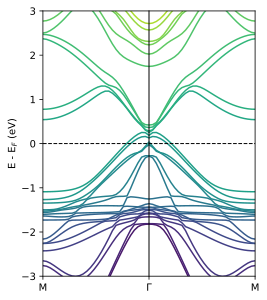

In [8]:
plot_bandstructure("./eucd2as2_MGM.bands.dat.gnu", 9.73, 9.73 - 3, 9.73 + 3, kpath = 'MGM', filename = 'eucd2as2', colormap = 'viridis')

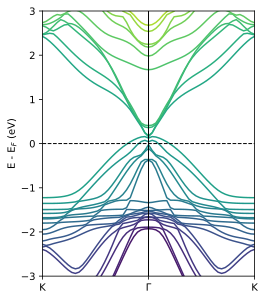

In [9]:
plot_bandstructure("./eucd2as2_KGK.bands.dat.gnu", 9.73, 9.73 - 3, 9.73 + 3, kpath = 'KGK', filename = 'eucd2as2', colormap = 'viridis')

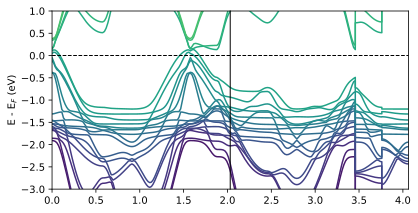

In [10]:
plot_bandstructure('./eucd2as2.bands.dat.gnu', 9.75, 9.75 - 3, 10.75, kpath = 'full', filename = 'eucd2as2', colormap = 'viridis')

In [17]:
len(data_new[0][0])

219

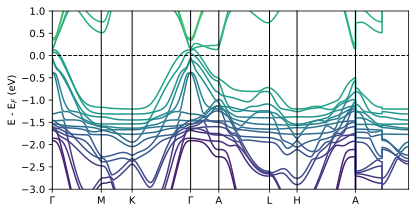

In [49]:
plot_bandstructure('./eucd2as2.bands.dat.gnu', 9.75, 9.75 - 3, 10.75, kpath = 'full', filename = 'eucd2as2', colormap = 'viridis')

# Constant Energy Cuts 0.5 eV MGM vs KGK
1. Need to plot MGM vs AGA or something at a constant energy (so kz vs ky). To do this, we can find the points in kz and ky paths that have that same energy. We want the electron bands (concave up). 
2. Thought process
    - Have to interpolate the data (since it's discrete) and then root solve... 

In [80]:
from scipy import interpolate
data = band_structure_gen("./eucd2as2_KGK.bands.dat.gnu")
data_new = remove_bands_energy_range(data, 9.73 - 3, 9.73 + 3)

In [94]:
# subtracting off the Energy value we want so that its zero now
# makes it good for root finding 
x = data_new[0][0]
y = np.array(data_new[0][1]) - 0.5 

for i in range(len(x)-1):
    if i == 0:
        continue 
    else:
        if x[i - 1] == x[i]:
            x.pop(i)
            y.pop(i)

test_func2 = interpolate.CubicSpline(x, y)

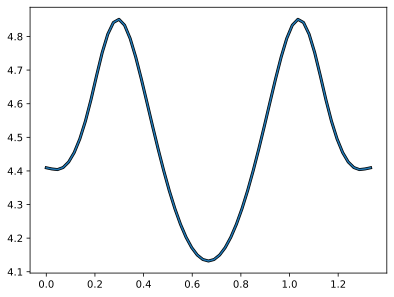

In [90]:
plt.plot(x, test_func2(x), color = 'black', linewidth = 3)
plt.plot(x, y)

In [97]:
test_func2.roots()

array([-0.3348461 ,  1.66749059])

In [101]:
def find_k_constant_energy(const_energy, file_path, fermi_energy, E_min, E_max):
    data = band_structure_gen("./eucd2as2_KGK.bands.dat.gnu")
    data_new = remove_bands_energy_range(data, fermi_energy - E_min, fermi_energy + E_max)
    
    for deet in data_new:
        x = deet[0]
        
        # shift y-values down 
        y = np.array(deet[1]) - const_energy 
        
        # get rid of any duplicate x's, which somehow is there... 
        for i in range(len(x)-1):
            if i == 0:
                continue 
            else:
                if x[i - 1] == x[i]:
                    x.pop(i)
                    y.pop(i)

        interpolation = interpolate.CubicSpline(x, y)
        
        energy_roots = interpolation.roots()
        for value in energy_roots:
            if value < 0.0 or value > x[-1]:
                continue 
            else:
                

IndentationError: expected an indented block (2233077525.py, line 26)